In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
img = cv2.imread('./第2-7章笔记课件/cat.jpg')
img.shape

(414, 500, 3)

In [124]:
def show_cv(name, img):
    cv2.imshow(name, img) # opencv读取格式是BGR
    cv2.waitKey(0)
    cv2.destroyAllWindows()

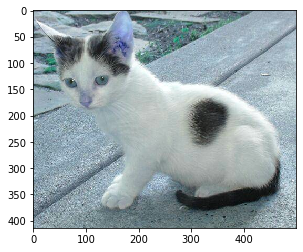

In [125]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 将BGR转为RGB
plt.imshow(img) # matplotlib读取格式是RGB

In [6]:
show_cv('cat', img)

## 灰度图

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
show_cv('gray_cat', img_gray)

In [9]:
img_gray.shape

(414, 500)

## HSV
- H -色调（主波长）
- S -饱和度（纯度/颜色的阴影）
- V值 - 强度

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [11]:
hsv.shape

(414, 500, 3)

In [12]:
show_cv('hsv', hsv)

## 图像阈值

In [13]:
# THRESH_BINARY: 超过阈值部分取maxval，否则取0
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# THRESH_BINARY_INV: THRESH_BINARY的反转，超过阈值部分取0，否则取maxval
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
# THRESH_TRUNC: 大于阈值部分设为阈值，否则不变
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# THRESH_TOZERO: 大于阈值部分不变，否则设为0
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
# THRESH_TOZERO_INV: 大于阈值部分设为0， 否则不变
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

In [14]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

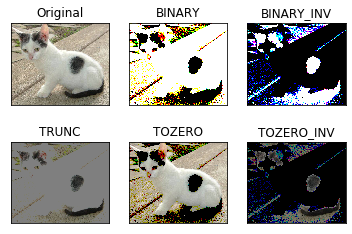

In [15]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [16]:
for i in range(6):
    show_cv(titles[i], images[i])

## 图像平滑

In [17]:
img1 = cv2.imread('./第2-7章笔记课件/lenaNoise.png')
show_cv('lenaNoise', img1)

In [18]:
# 均值滤波——简单平均卷积
blur = cv2.blur(img1, (3, 3))
show_cv('blur', blur)

In [19]:
# 方框滤波——基本和均值一样，可选择归一化
box = cv2.boxFilter(img1, -1, (3, 3), normalize=True)
show_cv('box', box)

In [20]:
box = cv2.boxFilter(img1, -1, (3, 3), normalize=False)
show_cv('box', box)

In [21]:
# 高斯滤波——卷积核里的数值满足高斯分布
gaussian = cv2.GaussianBlur(img1, (5, 5), 1)
show_cv('高斯', gaussian)

In [22]:
# 中值滤波
median = cv2.medianBlur(img1, 5)
show_cv('median', median)

In [23]:
# 图像拼接
res = np.hstack((blur, box, gaussian, median))
show_cv('all', res)

## 形态学——腐蚀操作

In [24]:
img3 = cv2.imread('./第2-7章笔记课件/dige.png')
show_cv('dige', img3)

In [25]:
# 3*3的核， 迭代一次
kernel = np.ones((3, 3), np.uint8)
erosion1 = cv2.erode(img3, kernel, iterations=1)
show_cv('3*3_1', erosion1)

In [29]:
# 3*3的核， 迭代两次
kernel = np.ones((3, 3), np.uint8)
erosion2 = cv2.erode(img3, kernel, iterations=2)
show_cv('3*3_2', erosion2)

In [26]:
# 3*3的核， 迭代三次
kernel = np.ones((3, 3), np.uint8)
erosion3 = cv2.erode(img3, kernel, iterations=3)
show_cv('3*3_3', erosion3)

In [27]:
# 3*3的核， 迭代四次
kernel = np.ones((3, 3), np.uint8)
erosion4 = cv2.erode(img3, kernel, iterations=4)
show_cv('3*3_3', erosion4)

In [30]:
res = np.hstack((erosion1, erosion2, erosion3, erosion4))
show_cv('res', res)

In [31]:
# 5*5的核， 迭代一次
kernel = np.ones((5, 5), np.uint8)
erosion5 = cv2.erode(img3, kernel, iterations=1)
show_cv('5*5_1', erosion5)

In [32]:
# 7*7的核， 迭代一次
kernel = np.ones((7, 7), np.uint8)
erosion7 = cv2.erode(img3, kernel, iterations=1)
show_cv('7*7_1', erosion7)

In [33]:
# 卷积核不同
res = np.hstack((erosion1, erosion5, erosion7))
show_cv('res', res)

In [34]:
pie = cv2.imread('./第2-7章笔记课件/pie.png')
show_cv('pie', pie)

In [39]:
# 卷积核不一样
kernel = np.ones((3, 3), np.uint8)
er1 = cv2.erode(pie, kernel, iterations=1)
kernel = np.ones((5, 5), np.uint8)
er2 = cv2.erode(pie, kernel, iterations=1)
kernel = np.ones((7, 7), np.uint8)
er3 = cv2.erode(pie, kernel, iterations=1)
res = np.hstack((pie, er1, er2, er3))
show_cv('res', res)

In [40]:
# 腐蚀次数不一样
kernel = np.ones((30, 30), np.uint8)
ero1 = cv2.erode(pie, kernel, iterations=1)
ero2 = cv2.erode(pie, kernel, iterations=2)
ero3 = cv2.erode(pie, kernel, iterations=3)
res = np.hstack((pie, ero1, ero2, ero3))
show_cv('res', res)

## 形态学——膨胀操作

In [47]:
dige = cv2.imread('./第2-7章笔记课件/dige.png')
show_cv('dige', dige)

In [48]:
kernel = np.ones((3, 3), np.uint8)
# 先腐蚀一次
eros = cv2.erode(dige, kernel, iterations=1)
show_cv('eros', eros)

In [49]:
# 再膨胀一次
dilate = cv2.dilate(eros, kernel, iterations=1)
show_cv('dilate', dilate)

In [50]:
res = np.hstack((dige, eros, dilate))
show_cv('res', res)

## 开运算与闭运算

In [51]:
# 开运算：先腐蚀，再膨胀
opening = cv2.morphologyEx(dige, cv2.MORPH_OPEN, kernel)
show_cv('open', opening)

In [52]:
# 闭运算：先膨胀， 再腐蚀
close = cv2.morphologyEx(dige, cv2.MORPH_CLOSE, kernel)
show_cv('close', close)

## 梯度运算

In [53]:
# 梯度运算 = 膨胀-腐蚀
pie = cv2.imread('./第2-7章笔记课件/pie.png')
kernel = np.ones((7,7), np.uint8)
dilate = cv2.dilate(pie, kernel, iterations=5)
erosion = cv2.erode(pie, kernel, iterations=5)
res = np.hstack((dilate, erosion))
show_cv('d_e', res)

In [54]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)
show_cv('all', np.hstack((dilate, erosion, gradient)))

## 礼帽与黑帽

In [55]:
# 礼帽 = 原始输入 - 开运算结果
dige = cv2.imread('./第2-7章笔记课件/dige.png')
kernel = np.ones((5,5), np.uint8)
tophat = cv2.morphologyEx(dige, cv2.MORPH_TOPHAT, kernel)
show_cv('礼帽', tophat)

In [56]:
# 黑帽 = 闭运算 - 原始输入
kernel = np.ones((7, 7), np.uint8)
blackhat = cv2.morphologyEx(dige, cv2.MORPH_BLACKHAT, kernel)
show_cv('blackhat', blackhat)

## 图像梯度-Sobel算子

In [57]:
pie = cv2.imread('./第2-7章笔记课件/pie.png', cv2.IMREAD_GRAYSCALE)
show_cv('pie', pie)

In [58]:
# 水平方向——白减黑是正数，黑减白是负数，所有负数被截断为0
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize=3)
show_cv('sobelx', sobelx)

In [59]:
res = np.hstack((pie, sobelx))
show_cv('all', res)

In [60]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize=3)
# 对负数取绝对值，使右半部分出现
sobelx = cv2.convertScaleAbs(sobelx) 
show_cv('sobelx-abs', sobelx)

In [61]:
# 竖直方向
sobely = cv2.Sobel(pie, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
show_cv('sobely', sobely)

### 先计算x和y, 再求和

In [62]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
show_cv('sobelxy', sobelxy)

### 水平、垂直两方向直接综合计算，效果不好

In [63]:
sobelxy_ = cv2.Sobel(pie, cv2.CV_64F, 1, 1, ksize=3)
show_cv('sobelxy_', sobelxy_)

In [64]:
res = np.hstack((sobelxy, sobelxy_))
show_cv('- -', res)

In [6]:
lena = cv2.imread('./第2-7章笔记课件/lena.jpg')
show_cv('lena', lena)

In [7]:
# 分别计算两方向，在加权求和
sx = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=3)
sx = cv2.convertScaleAbs(sx)
sy = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=3)
sy = cv2.convertScaleAbs(sy)
sxy = cv2.addWeighted(sx, 0.5, sy, 0.5, 0)
show_cv('sxy', sxy)

In [8]:
s_xy = cv2.Sobel(lena, cv2.CV_64F, 1, 1, ksize=3)
s_xy = cv2.convertScaleAbs(s_xy)
show_cv('s_xy', s_xy)

In [9]:
res = np.hstack((sxy, s_xy))
show_cv('res', res)

## 图像梯度-Scharr算子和laplacian算子

In [10]:
# Scharr算子
lena = cv2.imread('./第2-7章笔记课件/lena.jpg')
scharrx = cv2.Scharr(lena, cv2.CV_64F, 1, 0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(lena, cv2.CV_64F, 0, 1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)
show_cv('SCHARR', scharrxy)

In [11]:
# laplacian算子
laplacian = cv2.Laplacian(lena, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
show_cv('laplacian', laplacian)

In [12]:
res = np.hstack((sxy, scharrxy, laplacian))
show_cv('res', res)

## Canny边缘检测

In [14]:
lena = cv2.imread('./第2-7章笔记课件/lena.jpg')

v1 = cv2.Canny(lena, 80, 150)
v2 = cv2.Canny(lena, 50, 100)

res = np.hstack((v1, v2))
show_cv('res', res)

In [22]:
car = cv2.imread('./第2-7章笔记课件/car.png')

v1 = cv2.Canny(car, 120, 250)
v2 = cv2.Canny(car, 50, 100)
res = np.hstack((v1, v2))
show_cv('res', res)

## 图像金字塔——缩放图像

In [23]:
# 高斯金字塔
am = cv2.imread('./第2-7章笔记课件/AM.png')
show_cv('AM', am)
am.shape

(442, 340, 3)

In [24]:
# 向上采样（放大）
up = cv2.pyrUp(am)
show_cv('up', up)
up.shape

(884, 680, 3)

In [25]:
# 向下采样（缩小）
down = cv2.pyrDown(am)
show_cv('down', down)
down.shape

(221, 170, 3)

In [26]:
# 二次向上采样
up2 = cv2.pyrUp(up)
show_cv('up2', up2)
up2.shape

(1768, 1360, 3)

In [27]:
# 先向上采样，再向下采样
up = cv2.pyrUp(am)
down_up = cv2.pyrDown(up)
show_cv('up_down', down_up)

In [28]:
# 先向下采样，再向上采样
down = cv2.pyrDown(am)
up_down = cv2.pyrUp(down)
show_cv('down_up', up_down)

In [29]:
show_cv('all', np.hstack((am, down_up, up_down)))

In [37]:
up = cv2.pyrUp(am)
up_down = cv2.pyrDown(up)
aa = am - up_down
aa.shape
show_cv('am-up_down', aa)

## 拉普拉斯金字塔——缩放图像

In [36]:
down=cv2.pyrDown(am)
down_up=cv2.pyrUp(down)
l_1=am-down_up
show_cv('l_1',l_1)

## 图像轮廓

In [90]:
contours = cv2.imread('./第2-7章笔记课件/contours.png')
show_cv('contours', contours)

In [91]:
contours.shape

(466, 619, 3)

In [92]:
# 转灰度图
gray = cv2.cvtColor(contours, cv2.COLOR_BGR2GRAY)
show_cv('gray', gray)

In [93]:
# 二值化——大于127的换为255, 否则为0
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show_cv('bi', thresh)

In [94]:
# 找出轮廓
cont, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [95]:
# 绘制轮廓
draw_conto = contours.copy()
res = cv2.drawContours(draw_conto, cont, -1, (0,0,255),2)
show_cv('res', res)

In [96]:
# 绘制轮廓
draw_conto = contours.copy()
res = cv2.drawContours(draw_conto, cont, 0, (0,0,255),2)
show_cv('res', res)

In [100]:
cnt = cont[0]
print(cv2.contourArea(cnt))
print(cv2.arcLength(cnt, False))

8500.5
436.9482651948929


## 轮廓近似

In [101]:
img = cv2.imread('./第2-7章笔记课件/contours2.png')
show_cv('contours2', img)

In [108]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cont, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
draw_img = img.copy()
res = cv2.drawContours(draw_img, cont, -1, (0,0,255), 2)
show_cv('res', res)

In [112]:
epsilon = 0.1 * cv2.arcLength(cont[0], True)
approx = cv2.approxPolyDP(cont[0], epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0,0,255), 2)
show_cv('res', res)

In [120]:
# 边界矩形
img = cv2.imread('./第2-7章笔记课件/contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[3]

x,y,w,h = cv2.boundingRect(cnt)
img1 = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
show_cv('img1', img1)

In [121]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.7354456063680349


In [122]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img2 = cv2.circle(img,center,radius,(0,255,0),2)
show_cv('img2', img2)